# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-30 02:12:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 02:12:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 02:12:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
# numpy import
fruits = np.load('fruits_300.npy')
# fruits_300,npy 파일에 있는 모든 데이터를 fruits에 할당
fruits_2d = fruits.reshape(-1, 100*100)
# k-평균 모델을 훈련하기 위해 (샘플개수, 너비, 높이) 3차원 배열을 (샘플개수, 너비*높이) 2차원 배열로 변경

In [3]:
from sklearn.decomposition import PCA
# PCA 클래스 import
pca = PCA(n_components=50)
# PCA 객체 pca 생성 후, 주성부 개수인 n_componenets를 50으로 설정
pca.fit(fruits_2d)
# 모델 학습

PCA(n_components=50)

In [4]:
print(pca.components_.shape)
# 주성분의 형태 출력

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  # 각 클러스터가 어떤 그리을 나타내는지 그림으로 출력하는 draw_fruits() 함수

  n = len(arr)
  # n은 샘플 개수

  rows = int(np.ceil(n/10))
  # 한 줄에 10개씩 이미지를 그림, 샘플 개수를 10으로 나누어 전체 행 개수를 계산

  cols = n if rows < 2 else 10
  # 행이 1개면 열 개수는 샘플 개수, 그렇지 않으면 10개로 설정

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
      # n개까지만 그림

  plt.show()
  # 그림 출력

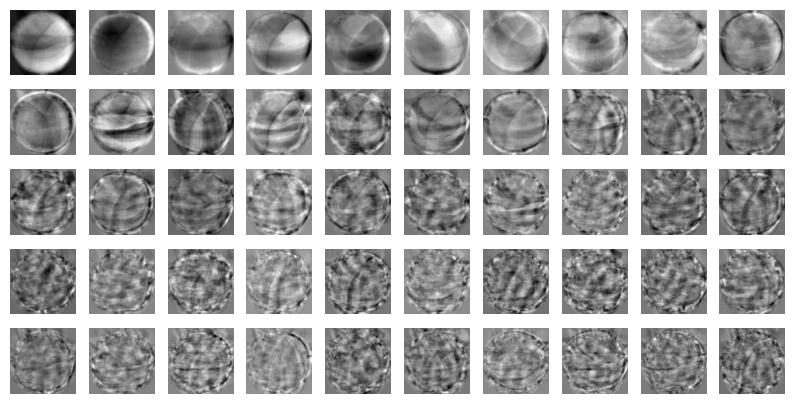

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 주성분을 100 * 100 크기의 이미지로 출력

In [7]:
print(fruits_2d.shape)
# 원본 데이터의 형태 출력

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)
# transform()을 통해서 원본 데이터의 차원을 50으로 줄임

In [9]:
print(fruits_pca.shape)
# 차원이 줄어든 데이터 형태 출력

(300, 50)


## 원본 데이터 재구성

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
# inverse_transform() 매서드를 통해 원본 데이터를 복원
print(fruits_inverse.shape)
# 복원된 데이터 형태 출력

(300, 10000)


In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
# 데이터를 100 * 100 크기로 바꿈

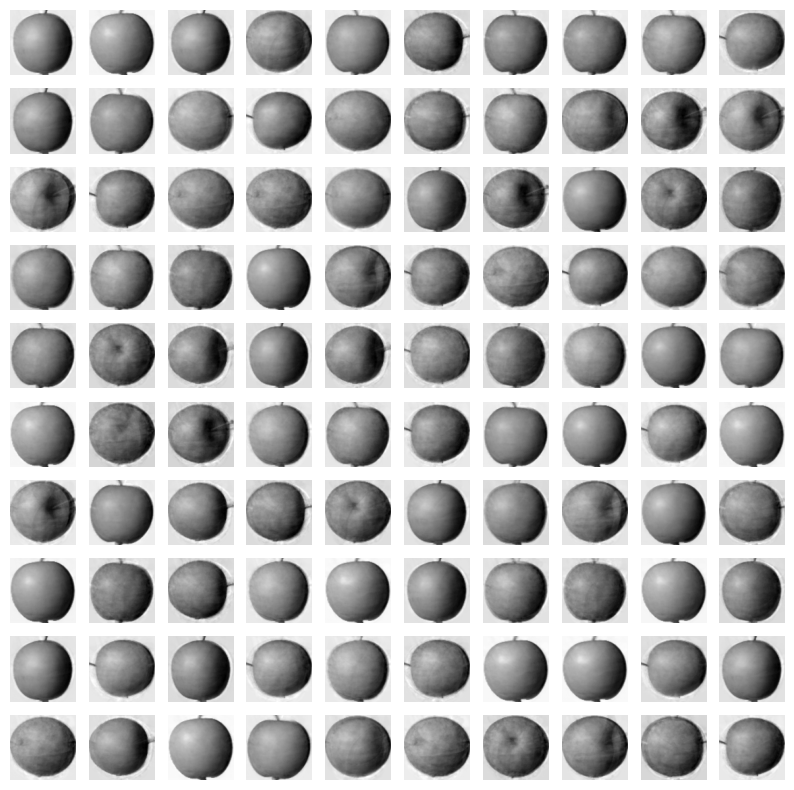

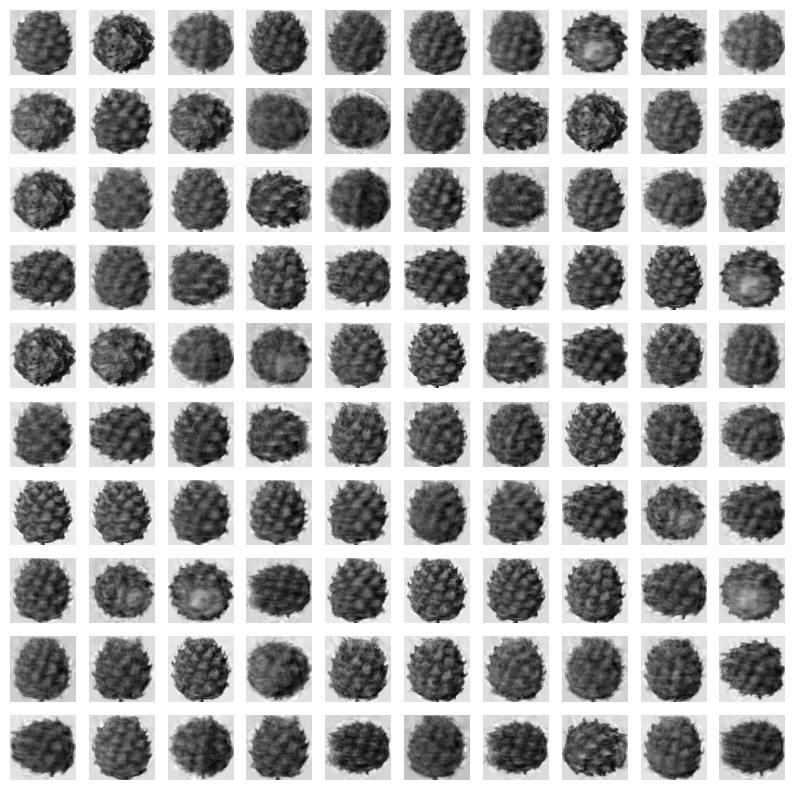

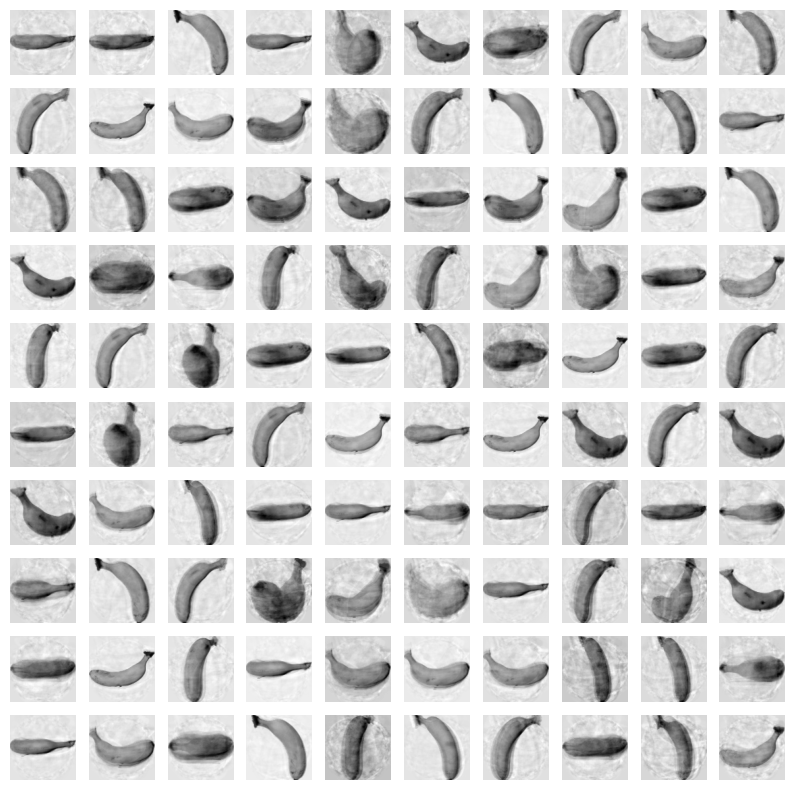

In [12]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")
    # 사과, 파인애플, 바나나를 각 100개씩 출력

## 설명된 분산

In [13]:
print(np.sum(pca.explained_variance_ratio_))
# explained_variance_ratio_를 통해서 각 주성분의 설명된 분산 비율을 기록
# np.sum()을 통해서 분산 비율을 모두 더해 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻음

0.9214836987982702


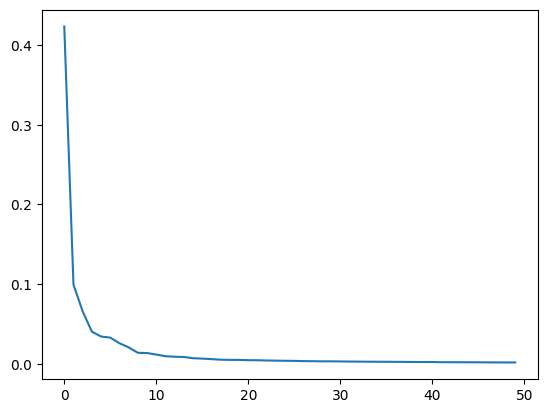

In [14]:
plt.plot(pca.explained_variance_ratio_)
# 분산의 비율을 그래프로 그림

## 다른 알고리즘과 함께 사용하기

In [15]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression 클래스 import
lr = LogisticRegression()
# LogisticRegression의 객체 lr 생성

In [16]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
# 지도 학습 모델이므로 타깃값을 생성
# 0은 사과, 1은 파인애플, 2는 바나나로 지정
# 각 과일마다 100개의 데이터가 있으므로 [0], [1], [2]에 100을 곱해서 타깃값을 생성

In [17]:
from sklearn.model_selection import cross_validate
# cross_validate import
scores = cross_validate(lr, fruits_2d, target)
# cross_validate()을 통해 원본 데이터와 교차 검증을 실행
print(np.mean(scores['test_score']))
# 교차 검증 점수 출력
print(np.mean(scores['fit_time']))
# 훈련 시간 출력

0.9966666666666667
1.671656894683838


In [18]:
scores = cross_validate(lr, fruits_pca, target)
# cross_validate()을 통해 차원 축소된 데이터와 교차 검증을 실행
print(np.mean(scores['test_score']))
# 교차 검증 점수 출력
print(np.mean(scores['fit_time']))
# 훈련 시간 출력

1.0
0.026882505416870116


In [19]:
pca = PCA(n_components=0.5)
# 0 ~ 1 사이의 값을 넣어서 분산의 비율을 입력 가능
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [20]:
print(pca.n_components_)
# 주성분의 개수 출력

2


In [21]:
fruits_pca = pca.transform(fruits_2d)
# 주성분을 2개 갖는 모델로 원본 데이터를 변환
print(fruits_pca.shape)
# 변환된 데이터 형태 출력

(300, 2)


In [22]:
scores = cross_validate(lr, fruits_pca, target)
# cross_validate()를 통해 차원 축소된 데이터와 교차 검증을 실행
print(np.mean(scores['test_score']))
# 교차 검증 점수 출력
print(np.mean(scores['fit_time']))
# 훈련 시간 출력

0.9933333333333334
0.039488935470581056


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
from sklearn.cluster import KMeans
# KMeans 클래스 import
km = KMeans(n_clusters=3, random_state=42)
# n_cluster를 3으로 설정
km.fit(fruits_pca)
# 모델 학습

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [24]:
print(np.unique(km.labels_, return_counts=True))
# fruits_pca로 찾은 클러스터는 각각 91, 99, 110의 샘플을 포함

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


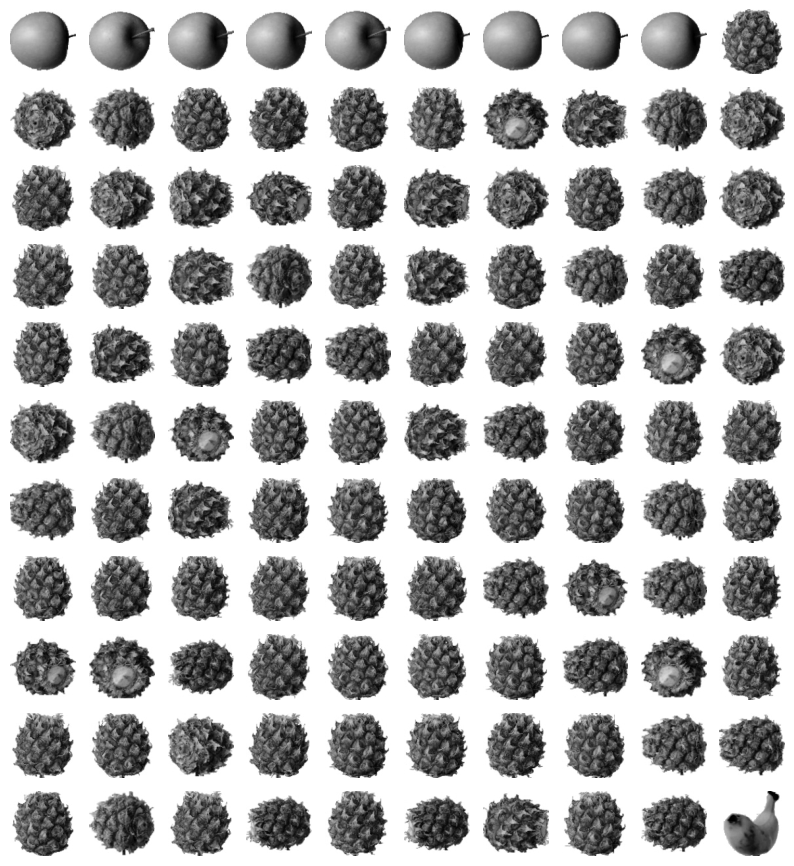

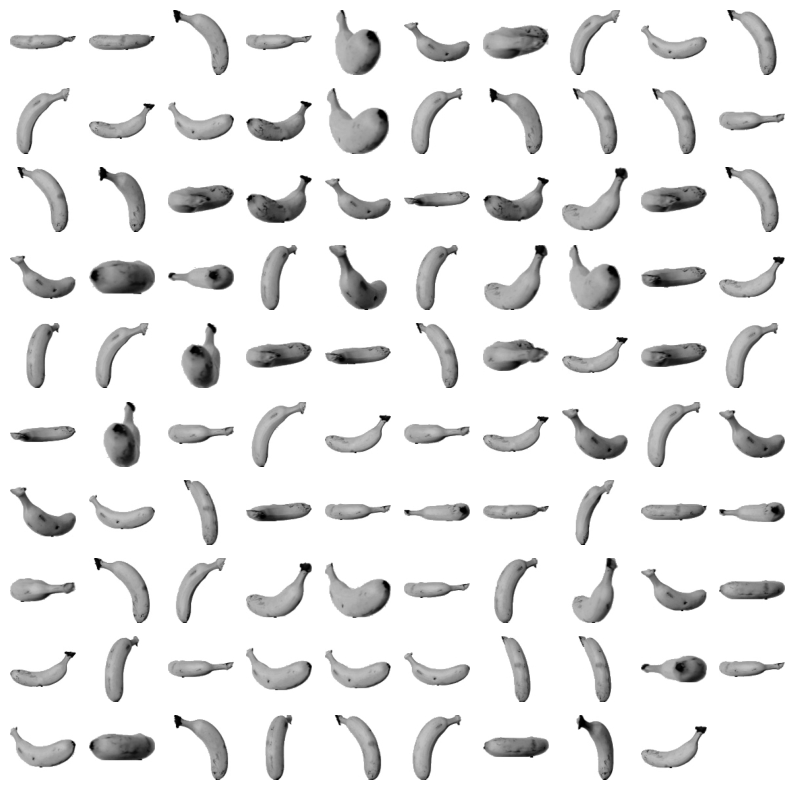

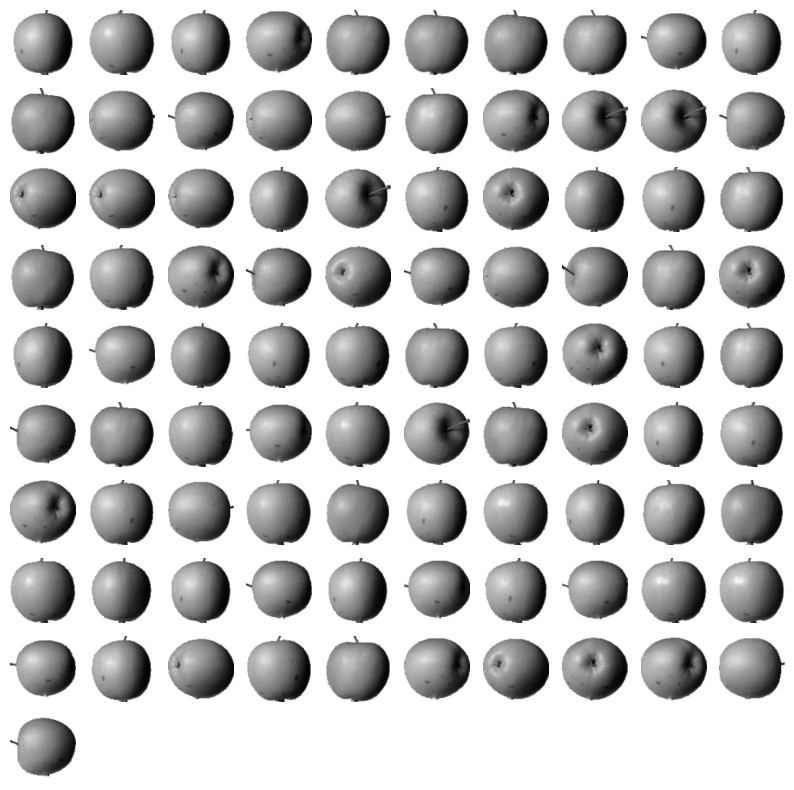

In [25]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
    # KMeans가 찾으 레이블을 사용해 과일 이미지 출력

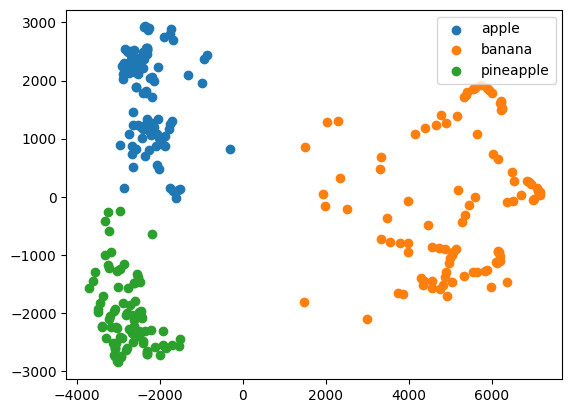

In [26]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()
# 앞에서 찾은 km.labels_를 사용해 클러스터별로 나누어 산점도 출력